In [80]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
X = 4 + np.random.randn(100,1)
y = 3 + 4 * X + np.random.randn(100,1)

In [31]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print ("Linear Regression : Intercept: {} Coef : {} ".format(lin_reg.intercept_,lin_reg.coef_))

Linear Regression : Intercept: [2.61881152] Coef : [[4.15487784]] 


In [38]:
sgd_reg = SGDRegressor(n_iter=1,eta0=0.0005,penalty=None)
sgd_reg.fit(X,y)
print ("SGD Regression : Intercept: {}  Coef : {}".format(sgd_reg.intercept_,sgd_reg.coef_))

SGD Regression : Intercept: [0.33630592]  Coef : [1.40918145]


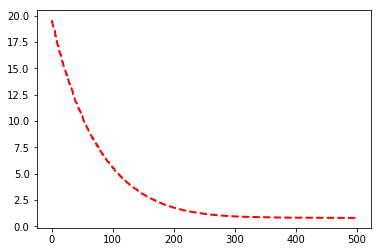

In [102]:
n_epochs = 500
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)

sgd_reg = SGDRegressor(max_iter=1,eta0=0.0005,penalty=None,warm_start=True,learning_rate='constant')


#sgd_reg = SGDRegressor(max_iter=1,
#                       penalty=None,
#                       eta0=0.0005,
#                       warm_start=True,
#                       learning_rate="constant",
#                       random_state=42)


n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))

#train_errors, val_errors = [] , []
#for i in range(n_epochs):
    #sgd_reg.fit(X_train,y_train)
    #y_train_predict = sgd_reg.predict(X_train)

    #sgd_reg.fit(X_train_poly_scaled,y_train)
    #y_train_predict = sgd_reg.predict(X_train_poly_scaled)

    #print ("SGD Regression : Intercept: {}  Coef : {}".format(sgd_reg.intercept_,sgd_reg.coef_))
    #train_errors.append(mean_squared_error(y_train, y_train_predict))
    #plt.plot(X,sgd_reg.intercept_+sgd_reg.coef_*X,label = 'Sklearn - SGD Regression')
    
#plt.legend(loc='lower right')

plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")B

[0.81723182] [3.44284064]
[2.61881152] [[4.15487784]]


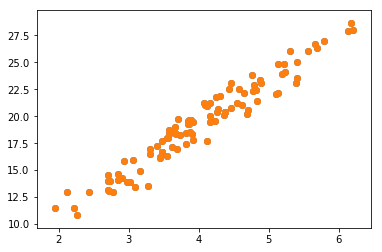

In [132]:
plt.scatter(X,y)
sgd_reg=SGDRegressor(n_iter=50,eta0=0.0001)
sgd_reg.fit(X,y)
print (sgd_reg.intercept_,sgd_reg.coef_)
#plt.plot(X,sgd_reg.intercept_+X*sgd_reg.coef_)


plt.scatter(X,y)
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print (lin_reg.intercept_,lin_reg.coef_)
#plt.plot(X,lin_reg.intercept_+X*lin_reg.coef_)

In [118]:
X_b = np.c_[np.ones((100,1)),X]

In [262]:
X_train[:,1]

array([1.94573347, 3.45387316, 2.21501999, 2.43131669, 4.58195649,
       2.12742795, 6.20501508, 3.48080161, 3.62048711, 3.30043745,
       5.1068862 , 5.78984468, 5.39202867, 4.79057492, 4.30162091,
       2.84352249, 3.73440765, 6.17526365, 2.70733155, 5.40414511,
       3.05828548, 2.93334493, 3.82485498, 3.70956531, 3.55392893,
       3.44184803, 5.22763988, 3.48252377, 4.16628367, 4.54172567,
       3.85642138, 3.90923008, 5.18642035, 2.70391531, 3.92384015,
       4.11327365, 2.70873541, 3.40678213, 4.81911321, 6.13393997,
       5.40332339, 4.8932903 , 2.85493288, 2.73036057, 3.56328135,
       3.16278042, 4.69078251, 4.46088587, 4.15943554, 4.75832465])

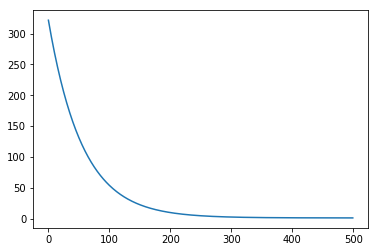

In [267]:
#--------------------------------------Variable Declaration
theta = np.random.rand(2,1)
n_epochs = 500
eta = 0.001
m = 100
train_error = []

X_train,X_val,y_train,y_val = train_test_split(X_b,y,test_size=0.5,random_state=132)

#Calculated - Linear Regression
for i in range(n_epochs):
    gradient = 1/m*X_train.T.dot(X_train.dot(theta) - y_train)
    theta = theta - eta * gradient
    y_train_pred = theta[0] + theta[1]*X_train[:,1]
    train_error.append(mean_squared_error(y_train,y_train_pred))
    #print ("Training Error :{}".format(mean_squared_error(y_train,y_train_pred)))
#print ("Cal    Regression :: Intercept: {}  : Coef  : {}".format(theta[0,0],theta[1,0]))
plt.plot(train_error)

#Sklearn - Linear Regression
#lin_reg=LinearRegression()
#lin_reg.fit(X,y)
#print ("Normal Regression :: Intercept: {}  : Coef : {}".format(lin_reg.intercept_[0],lin_reg.coef_[0,0]))

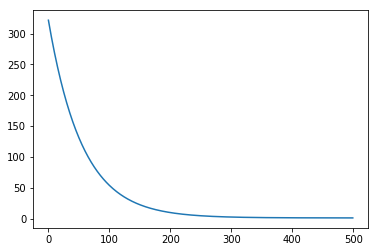

In [268]:
plt.plot(train_error)

Cal    Regression :: Intercept: 2.497514548281525  : Coef  : 4.18348165244377
Normal Regression :: Intercept: 2.6188115217626944  : Coef : 4.154877840287817
CalSGD Regression :: Intercept: 2.633762128893876  : Coef  : 4.159390381072431
SGD    Regression :: Intercept: 0.817857624123972   : Coef : 3.439954582490268


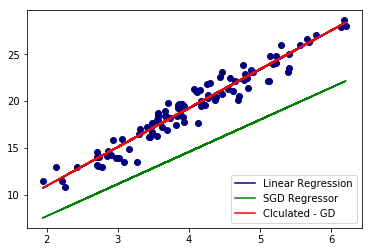

In [269]:
#--------------------------------------Variable Declaration
X_b = np.c_[np.ones((100,1)),X]
theta = np.random.rand(2,1)
n_epochs = 500
n_epochs_gd = 50
eta = 0.1
m = 100

#Calculated - Linear Regression
for i in range(n_epochs):
    gradient = 1/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient
print ("Cal    Regression :: Intercept: {}  : Coef  : {}".format(theta[0,0],theta[1,0]))


#Sklearn - Linear Regression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print ("Normal Regression :: Intercept: {}  : Coef : {}".format(lin_reg.intercept_[0],lin_reg.coef_[0,0]))



#Calculated - SGD
for epoch in range(n_epochs):
    for i in range(m):
        xi = X_b[i:i+1]
        yi = y[i:i+1]
        gradient = 1/m*xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradient
print ("CalSGD Regression :: Intercept: {}  : Coef  : {}".format(theta[0,0],theta[1,0]))



#Sklearn - SGD
sgd_reg=SGDRegressor(n_iter=50,eta0=0.0001)
sgd_reg.fit(X,y)
print ("SGD    Regression :: Intercept: {}   : Coef : {}".format(sgd_reg.intercept_[0],sgd_reg.coef_[0]))


plt.scatter(X,y,color='navy')
plt.plot(X,lin_reg.intercept_+X*lin_reg.coef_,label='Linear Regression',color='navy')
plt.plot(X,sgd_reg.intercept_+X*sgd_reg.coef_,label='SGD Regressor',color='green')
plt.plot(X,theta[0]+X*theta[1],label='Clculated - GD',color='red')

plt.legend(loc='lower right')

In [27]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')